In [2]:
import tensorflow as tf
import cv2
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
from os import walk
import numpy as np
import matplotlib.pyplot as plt
import pickle
import random

In [3]:
# you can download dataset from kaggle named natural_images
# storing images for training and testing
path = 'natural_images'
training_data = []
testing_data = []

dict_data = {
    'car': 0,
    'person': 1,
    'airplane': 2,
    'fruit': 3,
}

for i, (dirpath, dirnames, filenames) in enumerate(walk(path)):
  if i > 1 and i < 6:
    dir = dirpath
    lst = dir.split('\\')
    for im in filenames:
      temp = cv2.imread(dirpath + '\\' + im)
      img = cv2.resize(temp, (224, 224))
      training_data.append([img, dict_data[lst[-1]]])
  if i == 18 or i == 11 or i == 14 or i == 16:
    dir = dirpath
    lst = dir.split('\\')
    for im in filenames:
      temp = cv2.imread(dirpath + '\\' + im)
      img = cv2.resize(temp, (224, 224))
      testing_data.append([img, dict_data[lst[-1]]])

In [ ]:
#saving gotted list into binary format

with open('training_4cat.pickle', 'wb') as f:
  pickle.dump(training_data, f)
with open('testing_4cat.pickle', 'wb') as f:
  pickle.dump(testing_data, f)

In [35]:
# getting stored list

with open('training_4cat.pickle', 'rb') as f:
  training_data = pickle.load(f)
with open('testing_4cat.pickle', 'rb') as f:
  testing_data = pickle.load(f)

In [38]:
# shuffling the data

random.shuffle(training_data)
random.shuffle(testing_data)

In [39]:
#splitting into features and labels

train_x = []
train_y = []
test_x = []
test_y = []

for x, y in training_data:
  train_x.append(x)
  train_y.append(y)

for x, y in testing_data:
  test_x.append(x)
  test_y.append(y)

In [40]:
# converting into numpy array
train_x = np.array(train_x)
train_y = np.array(train_y)
test_x = np.array(test_x)
test_y = np.array(test_y)

In [41]:
# normalizing data

train_x = train_x/255.0
test_x = test_x/255.0

# transferring labels into categorical form

train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [ ]:
# getting transfer learning vgg model
vgg = VGG16(input_shape = train_x.shape[1:], weights = 'imagenet', include_top = False)

for layer in vgg.layers:
  layer.trainable = False

# changing the output layer
x = Flatten()(vgg.output)
predict = Dense(4, activation = 'softmax')(x)

model = Model(inputs = vgg.input, outputs = predict)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.fit(train_x, train_y, epochs = 5, batch_size = 32)

In [ ]:
val_loss, val_acc =  model.evaluate(test_x, test_y, batch_size = 32)

In [ ]:
y_pred = model.predict(test_x)

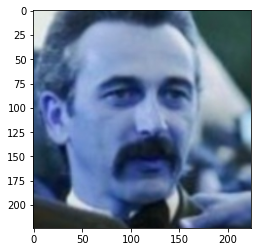

person


In [48]:
index = 226
plt.imshow(test_x[index])
plt.show()
dict_data = {0: 'car',1: 'person',2: 'airplane',3: 'fruit'}
val = np.argmax(y_pred[index])
print(dict_data[val])